<a href="https://colab.research.google.com/github/abhishek085/knowledge_graph_nlp/blob/main/knowledge_graph_nlp_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Wikipedia Data](https://en.wikipedia.org/wiki/Russo-Ukrainian_War)

## KNOWLEDGE GRAPH

SETUP

In [1]:
!pip install Wikipedia-API

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install textacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.7 MB/s eta 0:00:00


In [3]:
!pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 5.5 MB/s eta 0:00:00


In [4]:
## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2

## for text
import wikipediaapi  #0.5.8
import nltk  #3.8.1
import re   

## for nlp
import spacy  #3.5.0
from spacy import displacy
import textacy  #0.12.0

## for graph
import networkx as nx  #3.0 (also pygraphviz==1.10)

## for timeline
import dateparser #1.1.7


Extracting Data using Wikipedia API

In [5]:
topic = "Vehicle insurance in the United States"

wiki = wikipediaapi.Wikipedia('en')
page = wiki.page(topic)
txt = page.text[:page.text.find("See also")]
txt[0:1000] + " ..."

'Vehicle insurance in the United States (also known as car insurance or auto insurance) is designed to cover the risk of financial liability or the loss of a motor vehicle that the owner may face if their vehicle is involved in a collision that results in property or physical damage. Most states require a motor vehicle owner to carry some minimum level of liability insurance. States that do not require the vehicle owner to carry car insurance include Virginia, where an uninsured motor vehicle fee may be paid to the state, New Hampshire, and Mississippi, which offers vehicle owners the option to post cash bonds (see below).  The privileges and immunities clause of Article IV of the U.S. Constitution protects the rights of citizens in each respective state when traveling to another.  A motor vehicle owner typically pays insurers a monthly fee, often called an insurance premium.  The insurance premium a motor vehicle owner pays is usually determined by a variety of factors including the t

In [6]:
topic_2 = "Liability insurance"
wiki_2 = wikipediaapi.Wikipedia('en')
page_2 = wiki_2.page(topic_2)
txt_2 = page_2.text[:page.text.find("See also")]
txt_2[0:1000] + " ..."


'Liability insurance (also called third-party insurance) is a part of the general insurance system of risk financing to protect the purchaser (the "insured") from the risks of liabilities imposed by lawsuits and similar claims and protects the insured if the purchaser is sued for claims that come within the coverage of the insurance policy.\nOriginally, individual companies that faced a common peril formed a group and created a self-help fund out of which to pay compensation should any member incur loss (in other words, a mutual insurance arrangement). The modern system relies on dedicated carriers, usually for-profit, to offer protection against specified perils in consideration of a premium.\nLiability insurance is designed to offer specific protection against third-party insurance claims, i.e., payment is not typically made to the insured, but rather to someone suffering loss who is not a party to the insurance contract. In general, damage caused intentionally as well as contractual

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
import seaborn as sns

In [9]:
'''
Compute n-grams frequency with nltk tokenizer.
:parameter
    :param txt: text
    :param ngrams: int or list - 1 for unigrams, 2 for bigrams, [1,2] for both
    :param top: num - plot the top frequent words
:return
    dtf_count: dtf with word frequency
'''
def word_freq(txt, ngrams=[1,2,3], top=10, figsize=(10,7)):
    lst_tokens = nltk.tokenize.word_tokenize(txt)
    ngrams = [ngrams] if type(ngrams) is int else ngrams
    
    ## calculate
    dtf_freq = pd.DataFrame()
    for n in ngrams:
        dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
        dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
        dtf_n["ngrams"] = n
        dtf_freq = dtf_freq.append(dtf_n)
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
    dtf_freq = dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
                data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(top))
    ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    ax.grid(axis="x")
    plt.show()
    return dtf_freq

In [10]:
txt=txt+txt_2

<ipython-input-9-5414c20ffc92>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtf_freq = dtf_freq.append(dtf_n)
<ipython-input-9-5414c20ffc92>:27: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(top))


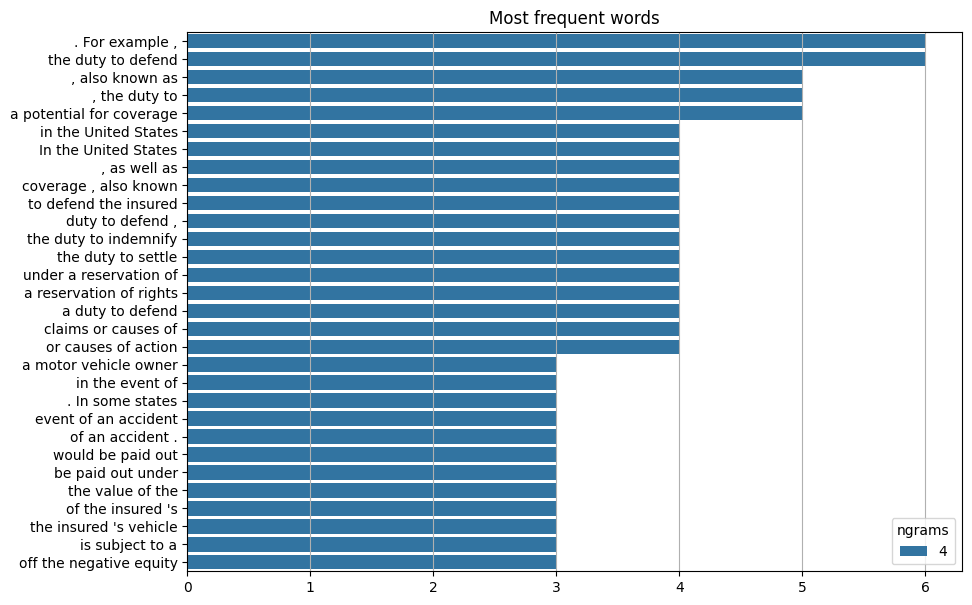

In [11]:
# Find most common words in text
_ = word_freq(txt, ngrams=[4], top=30, figsize=(10,7))

In [12]:
#python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
doc = nlp(txt)

In [13]:
doc #contains the text of both the articles

Vehicle insurance in the United States (also known as car insurance or auto insurance) is designed to cover the risk of financial liability or the loss of a motor vehicle that the owner may face if their vehicle is involved in a collision that results in property or physical damage. Most states require a motor vehicle owner to carry some minimum level of liability insurance. States that do not require the vehicle owner to carry car insurance include Virginia, where an uninsured motor vehicle fee may be paid to the state, New Hampshire, and Mississippi, which offers vehicle owners the option to post cash bonds (see below).  The privileges and immunities clause of Article IV of the U.S. Constitution protects the rights of citizens in each respective state when traveling to another.  A motor vehicle owner typically pays insurers a monthly fee, often called an insurance premium.  The insurance premium a motor vehicle owner pays is usually determined by a variety of factors including the ty

In [14]:
# converting sentences from docs:
for i in doc.sents:
  print(i,'********************')

Vehicle insurance in the United States (also known as car insurance or auto insurance) is designed to cover the risk of financial liability or the loss of a motor vehicle that the owner may face if their vehicle is involved in a collision that results in property or physical damage. ********************
Most states require a motor vehicle owner to carry some minimum level of liability insurance. ********************
States that do not require the vehicle owner to carry car insurance include Virginia, where an uninsured motor vehicle fee may be paid to the state, New Hampshire, and Mississippi, which offers vehicle owners the option to post cash bonds (see below).   ********************
The privileges and immunities clause of Article IV of the U.S. Constitution protects the rights of citizens in each respective state when traveling to another.   ********************
A motor vehicle owner typically pays insurers a monthly fee, often called an insurance premium.   ********************
The

In [31]:
lst_docs = [sent for sent in doc.sents]  # saving sentences in a list
print("tot sentences:", len(lst_docs))

i = 35
lst_docs[i]

tot sentences: 273


In some jurisdictions: Liability coverage is available either as a combined single limit policy, or as a split limit policy:

Combined single limit
A combined single limit combines property damage liability coverage and bodily injury coverage under one single combined limit.

In [32]:
print(lst_docs[i], "\n---")

for token in lst_docs[i]:
    print(token.text, "-->", "pos: "+token.pos_, "|", "dep: "+token.dep_, "")

In some jurisdictions: Liability coverage is available either as a combined single limit policy, or as a split limit policy:

Combined single limit
A combined single limit combines property damage liability coverage and bodily injury coverage under one single combined limit. 
---
In --> pos: ADP | dep: prep 
some --> pos: DET | dep: det 
jurisdictions --> pos: NOUN | dep: pobj 
: --> pos: PUNCT | dep: punct 
Liability --> pos: NOUN | dep: compound 
coverage --> pos: NOUN | dep: nsubj 
is --> pos: AUX | dep: ccomp 
available --> pos: ADJ | dep: acomp 
either --> pos: CCONJ | dep: preconj 
as --> pos: ADP | dep: prep 
a --> pos: DET | dep: det 
combined --> pos: VERB | dep: amod 
single --> pos: ADJ | dep: amod 
limit --> pos: NOUN | dep: compound 
policy --> pos: NOUN | dep: pobj 
, --> pos: PUNCT | dep: punct 
or --> pos: CCONJ | dep: cc 
as --> pos: ADP | dep: conj 
a --> pos: DET | dep: det 
split --> pos: NOUN | dep: compound 
limit --> pos: NOUN | dep: compound 
policy --> pos: NOU

In [17]:
displacy.render(lst_docs[i], style="dep", options={"distance":100})

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="1317a6ee366d478db7d9f7cf471bf8d7-0" class="displacy" width="2650" height="387.0" direction="ltr" style="max-width: none; height: 387.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="297.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">First,</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">ADV</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="297.0">\n    <tspan class="displacy-word" fill="currentColor" x="150">premiums</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="150">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="297.0">\n    <tspan class="displacy-word" fill="currentColor" x="250">on</tspan>\n    <tspan class="displac

In [33]:
for tag in lst_docs[i].ents:
    print(tag.text, f"({tag.label_})") 

In [19]:
displacy.render(lst_docs[i], style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    First\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORDINAL</span>\n</mark>\n, premiums on new occurrence policies skyrocketed, since the industry had come to a better appreciation of the true risks associated with such policy language.  </div>'

In [34]:
## Using POS/DEP
def extract_entities(doc):
    a, b, prev_dep, prev_txt, prefix, modifier = "", "", "", "", "", ""
    for token in doc:
        if token.dep_ != "punct":
            ## prexif --> prev_compound + compound 
            if token.dep_ == "compound":
                prefix = prev_txt +" "+ token.text if prev_dep == "compound" else token.text
            
            ## modifier --> prev_compound + %mod 
            if token.dep_.endswith("mod") == True:
                modifier = prev_txt +" "+ token.text if prev_dep == "compound" else token.text
            
            ## subject --> modifier + prefix + %subj 
            if token.dep_.find("subj") == True:
                a = modifier +" "+ prefix + " "+ token.text
                prefix, modifier, prev_dep, prev_txt = "", "", "", ""
            
            ## if object --> modifier + prefix + %obj 
            if token.dep_.find("obj") == True:
                b = modifier +" "+ prefix +" "+ token.text
            
            prev_dep, prev_txt = token.dep_, token.text
    
    # clean
    a = " ".join([i for i in a.split()])
    b = " ".join([i for i in b.split()])
    return (a.strip(), b.strip())

In [35]:
lst_entities = [extract_entities(i) for i in lst_docs]


In [36]:
for k in range(0,100):
  print(lst_entities[k])

('that', 'property')
('Most states', 'minimum liability insurance')
('New which', 'cash bonds')
('privileges', 'when U.S. another')
('motor vehicle owner', 'monthly fee')
('where driver vehicle', 'covered driver drivers')
('Most insurance companies', 'frequently insurance premium discounts')
('particular coverage which', 'traffic insurance')
('electronic versions', 'authorities')
('', '')
('different insurance they', 'different insurance policy')
('Coverage', 'sometimes 20/40/15')
('two numbers', 'medical coverage')
('100/300 policy', '300,000 people')
('last number', 'property damage')
('other you', 'accident')
('Personal Injury which', 'other things')
('other driver', 'insured')
('mandatory liability insurance drivers', 'other accident')
('states', 'responsibility requirements')
('personal auto use', 'vehicle')
('Commercial insurance pricing', 'commercial users')
('private vehicle insurance providers', 'market share')
('independent insurance who', 'insurance policies')
('online who',

In [37]:
## Using Matcher
def extract_relation(doc, nlp):
    matcher = spacy.matcher.Matcher(nlp.vocab)
    p1 = [{'DEP':'ROOT'}, 
          {'DEP':'prep', 'OP':"?"},
          {'DEP':'agent', 'OP':"?"},
          {'POS':'ADJ', 'OP':"?"}] 
    matcher.add(key="matching_1", patterns=[p1]) 
    matches = matcher(doc)
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]] 
    return span.text

In [39]:
lst_relations = [extract_relation(i,nlp) for i in lst_docs]
lst_relations[23]

'secured'

In [40]:
## Using NER
lst_attr = []
for x in lst_docs:
    attr = ""
    for tag in x.ents:
        attr = attr+tag.text if tag.label_=="DATE" else attr+""
    lst_attr.append(attr)

lst_attr

['',
 '',
 '',
 '',
 'monthly',
 '',
 '',
 '',
 '',
 '',
 '',
 '100/300/100',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2017',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'monthly',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'today',
 '',
 '',
 '',
 '1995',
 '',
 '',
 '',
 '',
 '2009',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2009',
 '',
 'the early 1980s',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'monthly',
 'monthly',
 '',
 '',
 '',
 '',
 '',
 '',
 'monthly',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'annual',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'the late 19th century',
 '',
 '',
 '1925',
 '',
 '',
 '',
 '1956',
 '1957the 1960s1970s',
 '1925',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2013',
 '',
 '20132013',
 '',
 '2013',
 '',


In [42]:
dtf = pd.DataFrame({"text":[doc.text for doc in lst_docs],
                    "entity":[i[0] for i in lst_entities],
                    "relation":lst_relations,
                    "object":[i[1] for i in lst_entities],
                    "attribute":lst_attr
                   })
dtf.head(3)

,text,entity,relation,object,attribute
0,Vehicle insurance in the United States (also k...,that,designed,property,
1,Most states require a motor vehicle owner to c...,Most states,require,minimum liability insurance,
2,States that do not require the vehicle owner t...,New which,include,cash bonds,


TEXTACY

In [43]:
dic = {"id":[], "text":[], "entity":[], "relation":[], "object":[]}

for n,sentence in enumerate(lst_docs):
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))  
    for sent in lst_generators:
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic["entity"].append(subj)
        dic["object"].append(obj)
        dic["relation"].append(relation)

dtf = pd.DataFrame(dic)
dtf[dtf["id"]==i]

,id,text,entity,relation,object
36,35,In some jurisdictions: Liability coverage is a...,limit,combines,liability_coverage_injury_coverage


In [44]:
dtf = dtf[dtf["object"].str.len() < 20]

In [45]:
## Date
attribute = "date"
dic = {"id":[], "text":[], attribute:[]}

for n,sentence in enumerate(lst_docs):
    lst = list(textacy.extract.entities(sentence, include_types={"DATE"}))
    if len(lst) > 0:
        for attr in lst:
            dic["id"].append(n)
            dic["text"].append(sentence.text)
            dic[attribute].append(str(attr))
    else:
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic[attribute].append(np.nan)

dtf_att = pd.DataFrame(dic)
dtf_att = dtf_att[~dtf_att[attribute].isna()]
dtf_att[dtf_att["id"]==i]

,id,text,date


In [46]:
## Location
attribute = "location"
dic = {"id":[], "text":[], attribute:[]}

for n,sentence in enumerate(lst_docs):
    lst = list(textacy.extract.entities(sentence, include_types={"LOC","GPE"}))
    if len(lst) > 0:
        for attr in lst:
            dic["id"].append(n)
            dic["text"].append(sentence.text)
            dic[attribute].append(str(attr))
    else:
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic[attribute].append(np.nan)

dtf_att_2 = pd.DataFrame(dic)
dtf_att_2 = dtf_att_2[~dtf_att_2[attribute].isna()]

dtf_att_2[dtf_att_2["id"]==i]

,id,text,location


NETWORK GRAPGH

In [47]:
## full
G = nx.from_pandas_edgelist(dtf, source="entity", target="object", edge_attr="relation", create_using=nx.DiGraph())

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


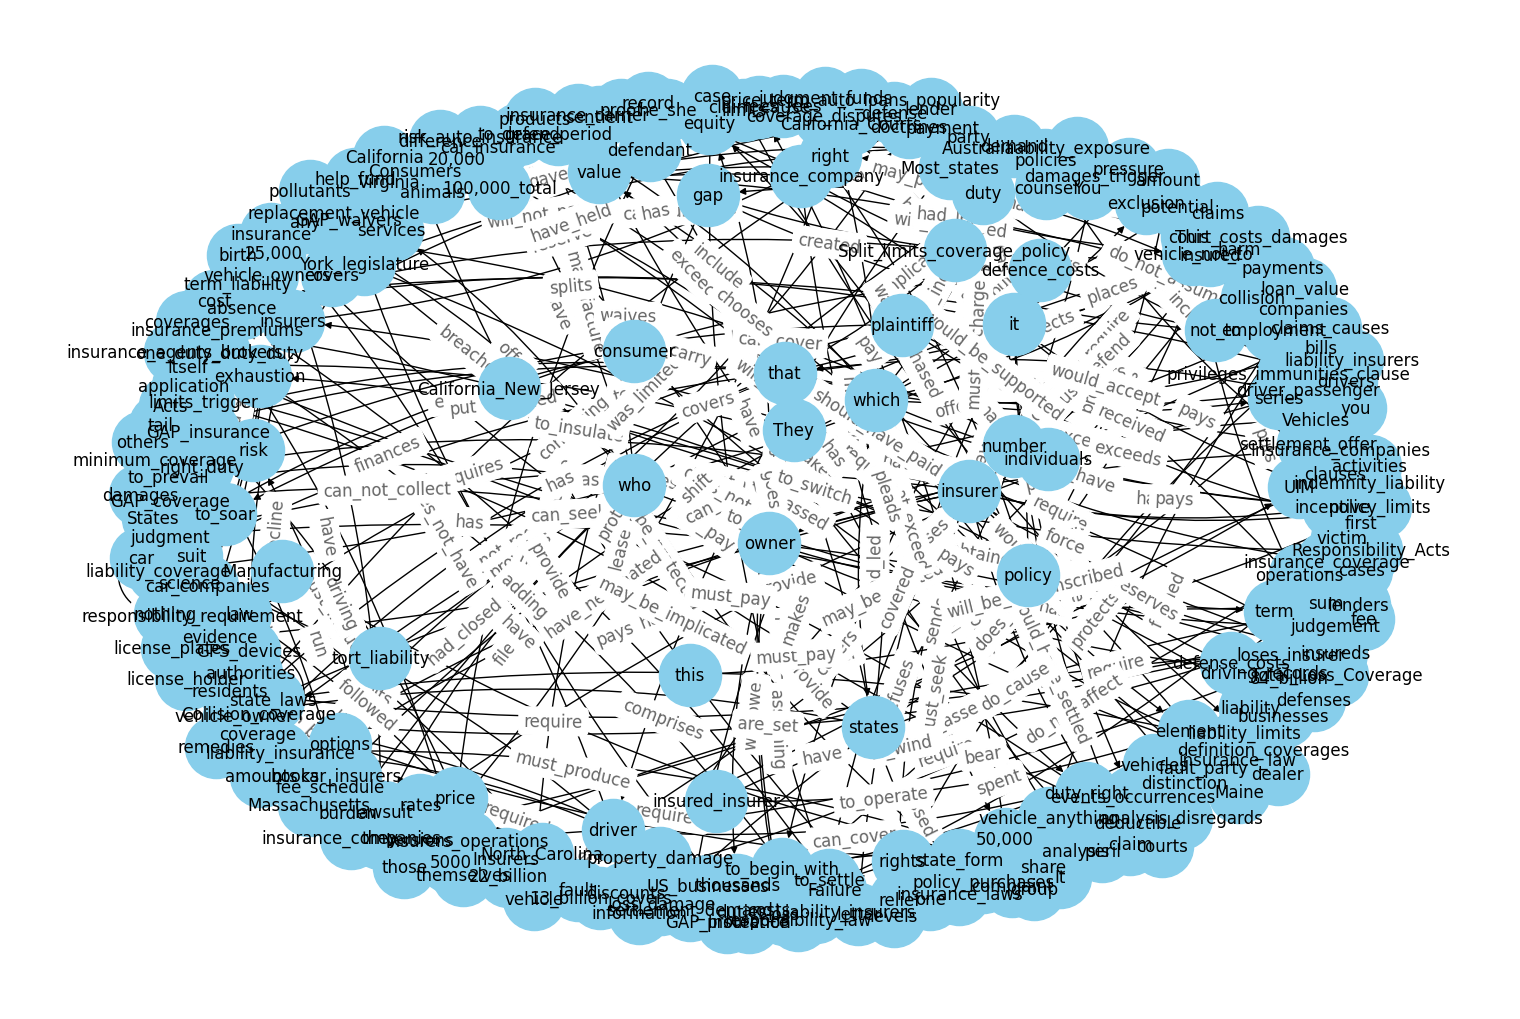

In [48]:
plt.figure(figsize=(15,10))

#pos = nx.nx_agraph.graphviz_layout(G, prog="fdp")
pos = nx.spring_layout(G, k=1)

node_color = "skyblue"
edge_color = "black"

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, edge_labels=nx.get_edge_attributes(G,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
plt.show()

In [49]:
## top
dtf["entity"].value_counts().head()

insurer    20
that       17
which      13
it         11
who        11
Name: entity, dtype: int64

In [50]:
## filter
f = "united states"
tmp = dtf[(dtf["entity"]==f) | (dtf["object"]==f)]

G = nx.from_pandas_edgelist(tmp, source="entity", target="object", edge_attr="relation", create_using=nx.DiGraph())

In [51]:
plt.figure(figsize=(15,10))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
#pos = nx.spring_layout(G, k=2.5)

node_color = ["red" if node==f else "skyblue" for node in G.nodes]
edge_color = ["red" if edge[0]==f else "black" for edge in G.edges]

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, edge_labels=nx.get_edge_attributes(G,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
plt.show()

ImportError: ignored

<Figure size 1500x1000 with 0 Axes>

### 3D

In [52]:
plt.figure(figsize=(15,10))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
#pos = nx.spring_layout(G, k=2.5)

node_color = ["red" if node==f else "skyblue" for node in G.nodes]
edge_color = ["red" if edge[0]==f else "black" for edge in G.edges]

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, edge_labels=nx.get_edge_attributes(G,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
plt.show()

ImportError: ignored

<Figure size 1500x1000 with 0 Axes>

PLOTLY

In [53]:
## setup
pos = nx.spring_layout(G, k=0.2)
for n,p in pos.items():
    G.nodes[n]['pos'] = p
    
## links
edge_x, edge_y = [], []
arrows = []
for n,edge in enumerate(G.edges()):
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    arrows.append([[x0,y0],[x1,y1]])

edge_trace = go.Scatter(x=edge_x, y=edge_y, mode='lines', showlegend=False)

## nodes
node_x, node_y = [], []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text', showlegend=False,
                        marker={"showscale":False, "colorscale":'YlGnBu', "reversescale":True, 
                                "size":10, "line_width":2})

## add details
link_text, node_text, node_color, node_size = [], [], [], []
for adjacencies in G.adjacency():
    node_text.append(adjacencies[0])
    for dic in adjacencies[1].values():
        link_text.append(dic["relation"])

node_trace.text = node_text
edge_trace.text = link_text

## layout
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(title=topic, showlegend=True, plot_bgcolor='white', 
                  hovermode='closest', width=800, height=800,
                  xaxis={"visible":False}, yaxis={"visible":False})

fig.show()

NameError: ignored

PARSE DATA

In [ ]:
def utils_parsetime(txt):
    x = re.match(r'.*([1-3][0-9]{3})', txt) #<-- check if there is a year
    if x is not None:
        try:
            dt = dateparser.parse(txt)
        except:
            dt = np.nan
    else:
        dt = np.nan
    return dt

In [ ]:
dtf_att["dt"] = dtf_att["date"].apply(lambda x: utils_parsetime(x))
dtf_att[dtf_att["id"]==i]

In [ ]:
## Merge
tmp = dtf.copy()
tmp["y"] = tmp["entity"]+" "+tmp["relation"]+" "+tmp["object"]

dtf_att = dtf_att.merge(tmp[["id","y"]], how="left", on="id")
dtf_att = dtf_att[~dtf_att["y"].isna()].sort_values("dt", ascending=True).drop_duplicates("y", keep='first')
dtf_att.head()

In [ ]:
## Full
dates = dtf_att["dt"].values
names = dtf_att["y"].values
l = [10,-10, 8,-8, 6,-6, 4,-4, 2,-2]
levels = np.tile(l, int(np.ceil(len(dates)/len(l))))[:len(dates)]

fig, ax = plt.subplots(figsize=(20,10))
ax.set(title=topic, yticks=[], yticklabels=[])

ax.vlines(dates, ymin=0, ymax=levels, color="tab:red")
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")

for d,l,r in zip(dates,levels,names):
    ax.annotate(r, xy=(d,l), xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l>0 else "top")

plt.xticks(rotation=90) 
plt.show()

In [ ]:
## Filter
yyyy = "2022"
dates = dtf_att[dtf_att["dt"]>yyyy]["dt"].values
names = dtf_att[dtf_att["dt"]>yyyy]["y"].values
l = [10,-10, 8,-8, 6,-6, 4,-4, 2,-2]
levels = np.tile(l, int(np.ceil(len(dates)/len(l))))[:len(dates)]

fig, ax = plt.subplots(figsize=(20,10))
ax.set(title=topic, yticks=[], yticklabels=[])

ax.vlines(dates, ymin=0, ymax=levels, color="tab:red")
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")

for d,l,r in zip(dates,levels,names):
    ax.annotate(r, xy=(d,l), xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l>0 else "top")

plt.xticks(rotation=90) 
plt.show()